In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [5]:
ds = pd.read_csv ("season-1718_csv.csv")

# Información del dataset

Significado de cada columna:

Div = División
Date = Fecha del partido (dd/mm/yy)
HomeTeam = Equipo local
AwayTeam = Equipo visitante
FTHG = Goles del equipo local en tiempo completo (90 min)
FTAG = Goles del equipo visitante en tiempo completo (90 min)
FTR and Res = Resultado final del partido (H = Victoria del equipo local, D = Empate, A = Victoria del equipo visitante)
HTHG = Goles del equipo local en medio tiempo (45 min)
HTAG = Goles del equipo visitante en medio tiempo (45 min)
HTR = Resultado del primer tiempo (H = Victoria del equipo local, D = Empate, A = Victoria del equipo visitante)

HS = Tiros del equipo local
AS = Tiros del equipo visitante
HST = Tiros al arco del equipo local
AST = Tiros al arco del equipo visitante
HC = Corners del equipo local
AC = Corners del equipo visitante
HF = Total de faltas del equipo local
AF = Total de faltas del equipo visitante
HY = Tarjetas amarillas del equipo local 
AY = Tarjetas amarillas del equipo visitante
HR = Tarjetas rojas del equipo local
AR = Tarjetas rojas del equipo visitante

In [6]:
ds.head(10) # Primeros 10 datos del dataset

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,18/08/17,Leganes,Alaves,1,0,H,1,0,H,...,1.46,18,-0.50,2.07,2.03,1.90,1.86,1.98,3.35,4.63
1,SP1,18/08/17,Valencia,Las Palmas,1,0,H,1,0,H,...,2.27,16,-0.75,2.05,1.97,1.96,1.91,1.78,4.24,4.43
2,SP1,19/08/17,Celta,Sociedad,2,3,A,1,1,D,...,1.84,18,-0.25,2.08,2.05,1.87,1.83,2.12,3.53,3.74
3,SP1,19/08/17,Girona,Ath Madrid,2,2,D,2,0,H,...,1.74,16,1.25,1.77,1.75,2.25,2.16,6.93,3.83,1.63
4,SP1,19/08/17,Sevilla,Espanol,1,1,D,1,1,D,...,2.09,16,-1.00,2.12,2.06,1.86,1.82,1.64,4.18,5.82
5,SP1,20/08/17,Ath Bilbao,Getafe,0,0,D,0,0,D,...,1.87,17,-1.00,1.90,1.86,2.05,2.01,1.53,4.48,6.91
6,SP1,20/08/17,Barcelona,Betis,2,0,H,2,0,H,...,2.88,17,-2.00,2.05,2.00,1.91,1.86,1.20,8.25,15.20
7,SP1,20/08/17,La Coruna,Real Madrid,0,3,A,0,2,A,...,2.64,16,1.50,2.03,1.98,1.95,1.89,12.40,7.00,1.26
8,SP1,21/08/17,Levante,Villarreal,1,0,H,0,0,D,...,1.58,15,0.25,1.93,1.89,2.03,1.98,3.31,3.32,2.40
9,SP1,21/08/17,Malaga,Eibar,0,1,A,0,0,D,...,1.70,17,-0.25,1.92,1.88,2.04,1.99,2.20,3.27,3.85


In [13]:
ds.tail(10) # Últimos 10 datos del dataset

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
370,SP1,19/05/18,Celta,Levante,4,2,H,2,1,H,...,2.82,20,-0.75,2.05,2.01,1.90,1.85,1.60,4.68,5.33
371,SP1,19/05/18,Las Palmas,Girona,1,2,A,1,2,A,...,2.36,19,0.25,1.94,1.90,2.00,1.95,3.44,4.01,2.06
372,SP1,19/05/18,Leganes,Betis,3,2,H,1,1,D,...,2.19,17,0.00,2.04,1.99,1.91,1.86,2.41,3.76,2.90
373,SP1,19/05/18,Malaga,Getafe,0,1,A,0,0,D,...,1.91,19,0.25,1.98,1.92,1.98,1.93,3.26,3.56,2.28
374,SP1,19/05/18,Sevilla,Alaves,1,0,H,1,0,H,...,2.86,19,-1.25,1.97,1.91,2.00,1.94,1.32,6.09,9.47
375,SP1,19/05/18,Villarreal,Real Madrid,2,2,D,0,2,A,...,3.79,19,0.25,2.05,1.98,1.93,1.87,4.74,5.05,1.62
376,SP1,20/05/18,Ath Bilbao,Espanol,0,1,A,0,1,A,...,2.06,17,-0.50,2.06,2.02,1.88,1.85,1.95,3.77,4.05
377,SP1,20/05/18,Ath Madrid,Eibar,2,2,D,1,1,D,...,1.98,19,-1.00,2.09,2.04,1.87,1.82,1.47,4.25,8.80
378,SP1,20/05/18,Barcelona,Sociedad,1,0,H,0,0,D,...,5.04,19,-2.00,1.94,1.89,2.03,1.97,1.31,6.40,8.60
379,SP1,20/05/18,Valencia,La Coruna,2,1,H,1,0,H,...,2.98,19,-1.50,2.01,1.97,1.94,1.89,1.27,6.44,10.71


In [8]:
ds.columns # Nombres de cada columna del dataset

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [9]:
ds.info() # Información del dataset, específicamente sobre las columnas, filas, dtype y los valores null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  HS        380 non-null    int64  
 11  AS        380 non-null    int64  
 12  HST       380 non-null    int64  
 13  AST       380 non-null    int64  
 14  HF        380 non-null    int64  
 15  AF        380 non-null    int64  
 16  HC        380 non-null    int64  
 17  AC        380 non-null    int64  
 18  HY        380 non-null    int64  
 19  AY        380 non-null    int64  
 20  HR        380 non-null    int64 

In [10]:
all_columns_list=ds.columns.values.tolist()
all_columns_list # Lista de columnas ordenadas

['Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'LBH',
 'LBD',
 'LBA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
 'Bb1X2',
 'BbMxH',
 'BbAvH',
 'BbMxD',
 'BbAvD',
 'BbMxA',
 'BbAvA',
 'BbOU',
 'BbMx>2.5',
 'BbAv>2.5',
 'BbMx<2.5',
 'BbAv<2.5',
 'BbAH',
 'BbAHh',
 'BbMxAHH',
 'BbAvAHH',
 'BbMxAHA',
 'BbAvAHA',
 'PSCH',
 'PSCD',
 'PSCA']

In [11]:
ds.describe() # Describe estadísticas, tales como el promedio, percentiles, deviación estándar, etc.

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,379.000000,379.000000,379.000000
mean,1.547368,1.147368,0.660526,0.486842,13.526316,10.471053,4.757895,3.805263,13.734211,13.952632,...,2.161921,18.160526,-0.405921,1.988079,1.937658,1.987763,1.937237,2.839156,4.507520,5.695330
std,1.378450,1.186720,0.852140,0.667635,4.537948,4.215401,2.446108,2.316392,4.301977,4.341354,...,0.740059,2.083487,0.949863,0.139137,0.131547,0.142106,0.133910,2.401263,2.170446,5.816988
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,4.000000,0.000000,...,1.410000,1.000000,-3.250000,1.610000,1.580000,1.680000,1.630000,1.060000,2.930000,1.160000
25%,0.750000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,11.000000,11.000000,...,1.717500,17.000000,-0.750000,1.890000,1.840000,1.897500,1.850000,1.640000,3.410000,2.590000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,4.500000,3.000000,13.000000,14.000000,...,1.920000,18.000000,-0.250000,1.985000,1.930000,1.970000,1.930000,2.120000,3.700000,3.850000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.000000,5.000000,17.000000,17.000000,...,2.282500,19.000000,0.062500,2.070000,2.020000,2.080000,2.030000,2.980000,4.560000,6.095000
max,7.000000,6.000000,5.000000,3.000000,30.000000,24.000000,14.000000,13.000000,29.000000,29.000000,...,5.970000,24.000000,2.000000,2.420000,2.340000,2.520000,2.440000,18.700000,18.500000,46.000000


# Graficación del dataset

<Figure size 1080x1080 with 0 Axes>

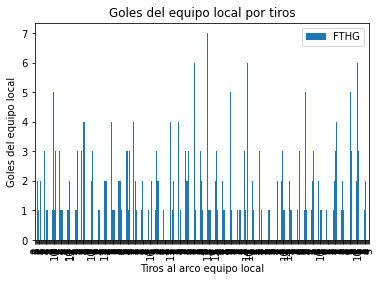

<Figure size 1080x1080 with 0 Axes>

In [15]:
ds.plot(kind="bar", x="HST", y="FTHG")
plt.xlabel("Tiros al arco equipo local")
plt.ylabel("Goles del equipo local")
plt.title("Goles del equipo local por tiros")
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

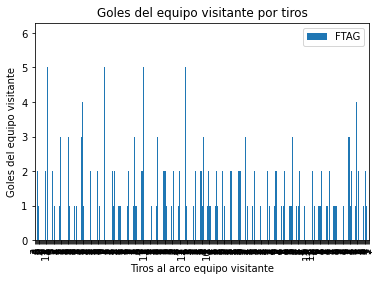

<Figure size 1080x1080 with 0 Axes>

In [16]:
ds.plot(kind="bar", x="AST", y="FTAG")
plt.xlabel("Tiros al arco equipo visitante")
plt.ylabel("Goles del equipo visitante")
plt.title("Goles del equipo visitante por tiros")
plt.figure(figsize=(15,15))

# Boxplot y matriz de 4 gráficos

Text(0.5, 1.0, 'Boxplot de goles del equipo local')

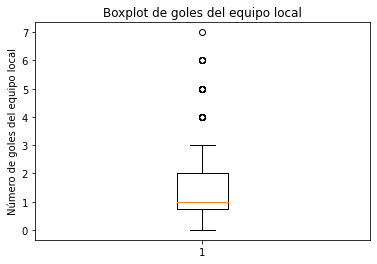

In [18]:
plt.boxplot(ds["FTHG"])
plt.ylabel("Número de goles del equipo local")
plt.title("Boxplot de goles del equipo local")

<AxesSubplot:xlabel='AS', ylabel='FTAG'>

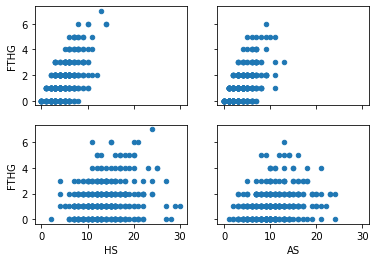

In [20]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True) 
ds.plot(kind="scatter", x="HST", y="FTHG", ax=axs[0][0]) # Goles por tiros al arco equipo local
ds.plot(kind="scatter", x="AST", y="FTAG", ax=axs[0][1]) # Goles por tiros al arco equipo visitante
ds.plot(kind="scatter", x="HS", y="FTHG", ax=axs[1][0])  # Goles por tiros totales equipo local
ds.plot(kind="scatter", x="AS", y="FTAG", ax=axs[1][1])  # Goles por tiros totales equipo visitante